## Computing portfolio simple returns, get daily returns and volatility

In [19]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('seaborn')

In [2]:
## getting stock symbols for portfolio
stocksymbols = ["FB", "AMZN", "AAPL", "GOOG", "NFLX"]

In [4]:
stock_start = '2013-01-01' # chose 2013 as FB had its IPO on 2012
stock_end = datetime.today().strftime('%Y-%m-%d')
print(stock_end)


2021-07-23


In [7]:
numberAssets = len(stocksymbols)
print('I have ' + str(numberAssets)+'assets in your portfolio')

I have 5assets in your portfolio


In [9]:
## Getting the stock prices in the portfolio
def getMyPortfolio(stocks = stocksymbols, start=stock_start, end=stock_end, col='Adj Close'):
        data = yf.download(stocksymbols,start,end)[col]
        return data


In [11]:
my_stocks = getMyPortfolio(stocksymbols)
my_stocks = my_stocks.iloc[1:,]
my_stocks

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2013-01-02,17.010899,257.309998,28.000000,360.274597,13.144286
2013-01-03,16.796177,258.480011,27.770000,360.483826,13.798571
2013-01-04,16.328323,259.149994,28.760000,367.607117,13.711429
2013-01-07,16.232281,268.459991,29.420000,366.003143,14.171429
2013-01-08,16.275965,266.380005,29.059999,365.280823,13.880000
...,...,...,...,...,...
2021-07-16,146.389999,3573.629883,341.160004,2636.909912,530.309998
2021-07-19,142.449997,3549.590088,336.950012,2585.080078,532.280029
2021-07-20,146.149994,3573.189941,341.660004,2622.030029,531.049988


In [20]:
## visualizing the portfolio
def showGraph(stocks = stocksymbols, start=stock_start, end= stock_end, col="Adj Close"):
    title = 'Portfolio' +col+ ' Price History'
    my_stocks = getMyPortfolio(stocks=stocks, start=start, end=end, col=col)
    plt.figure(figsize=(12,5))
    for item in my_stocks.columns.values:
        plt.plot(my_stocks[item], label = item)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel( col+ ' Price USD($)')
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show

[*********************100%***********************]  5 of 5 completed


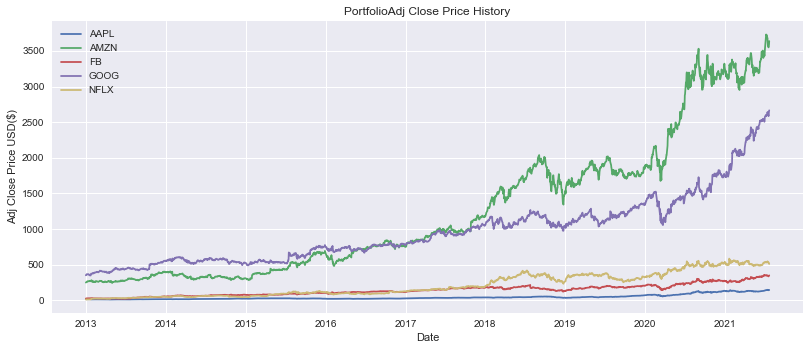

In [21]:
showGraph(stocksymbols)

In [24]:
 # Calculating the simple daily returns
daily_simplereturns = my_stocks.pct_change(1)

daily_simplereturns

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012623,0.004547,-0.008214,0.000581,0.049777
2013-01-04,-0.027855,0.002592,0.035650,0.019760,-0.006315
2013-01-07,-0.005882,0.035925,0.022949,-0.004363,0.033549
2013-01-08,0.002691,-0.007748,-0.012237,-0.001974,-0.020565
...,...,...,...,...,...
2021-07-16,-0.014076,-0.015854,-0.009580,0.004411,-0.023280
2021-07-19,-0.026914,-0.006727,-0.012340,-0.019656,0.003715
2021-07-20,0.025974,0.006649,0.013978,0.014294,-0.002311


In [25]:
# stock correlation
daily_simplereturns.corr()

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,1.000000,0.463219,0.461457,0.526336,0.276617
AMZN,0.463219,1.000000,0.524287,0.603825,0.455205
FB,0.461457,0.524287,1.000000,0.571666,0.362885
GOOG,0.526336,0.603825,0.571666,1.000000,0.416589
NFLX,0.276617,0.455205,0.362885,0.416589,1.000000


In [28]:
# stock covariance / variance
daily_simplereturns.cov()

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,0.000322,0.000159,0.000178,0.000153,0.000142
AMZN,0.000159,0.000364,0.000215,0.000186,0.000248
FB,0.000178,0.000215,0.000463,0.000199,0.000223
GOOG,0.000153,0.000186,0.000199,0.000261,0.000193
NFLX,0.000142,0.000248,0.000223,0.000193,0.000817


In [29]:
daily_simplereturns.var()

AAPL    0.000322
AMZN    0.000364
FB      0.000463
GOOG    0.000261
NFLX    0.000817
dtype: float64

In [30]:
# stock volatility ( Standard Deviation for daily simple returns)
print(" The Stock Volatility:")
daily_simplereturns.std()

 The Stock Volatility:


AAPL    0.017957
AMZN    0.019074
FB      0.021520
GOOG    0.016169
NFLX    0.028585
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

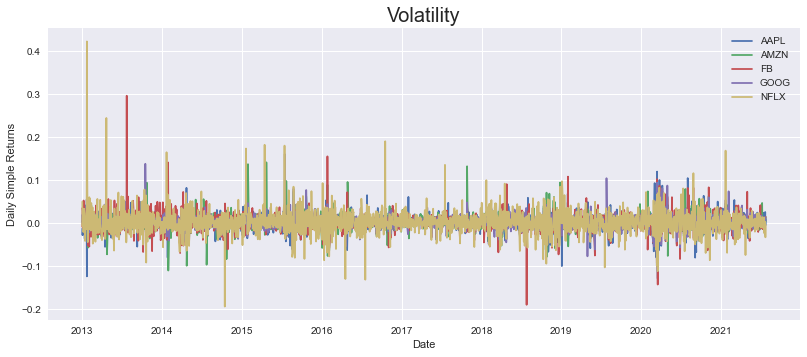

In [32]:
# Visualizing stocks daily simple returns / volatiltiy
plt.figure(figsize=(12,5))
for item in daily_simplereturns.columns.values:
    plt.plot(daily_simplereturns[item], label = item)
    
plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show


In [35]:
# show the mean of the daily simple return
dailyMeanSimpleReturns = daily_simplereturns.mean()
print(dailyMeanSimpleReturns)

AAPL    0.001163
AMZN    0.001412
FB      0.001404
GOOG    0.001060
NFLX    0.002097
dtype: float64


In [37]:
# Calculate the expected portfolio daily return
randomweight = np.array([0.4,0.1,0.1,0.3,0.1]) # 40% AAPL, 10% AMZN, 10% FB, 30% GOOG, 10% NFLX

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomweight)

# Print the expected portfolio return
print('The daily expected portfolio return: '+ str(portfolioSimpleReturn))
      
    

The daily expected portfolio return: 0.0012745149053717546


In [38]:
# Yearly portfolio return
print("Expected annualised portfolio simple return: " +str(portfolioSimpleReturn * 253))
#(number of trading days are assumed to be 253)

Expected annualised portfolio simple return: 0.3224522710590539


In [ ]:
# total return 